<a href="https://colab.research.google.com/github/mengen-liu/sysid/blob/main/Caso_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sysidentpy=="0.2.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92 kB 1.1 MB/s 
     |████████████████████████████████| 9.4 MB 15.4 MB/s 
     |████████████████████████████████| 295 kB 61.5 MB/s 
     |████████████████████████████████| 965 kB 52.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 37.8 MB 1.2 MB/s 
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=11152246 sha256=58d2dba9f8cfb63f716708dddaf50346006610356d57e8ea9e1c417e535f59d6
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sysidentpy 0.2.1 requires matplotlib>=3.3.2, but you have matplotlib 3.1.1 which is incompatible.


In [ ]:
# # python = 3.9 (<3.10)
# # pip install sysidentpy=="0.1.6" 0.2.1
# from sysidentpy.basis_function._basis_function import Polynomial
# from sysidentpy.model_structure_selection import FROLS
# from sysidentpy.metrics import root_relative_squared_error
# from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
# from sysidentpy.utils.display_results import results
# from sklearn.metrics import r2_score
# from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.fft import fft, fftshift,fftfreq
# from scipy.signal import welch
# from scipy import stats

# # NARX
# from sysidentpy.general_estimators import NARX
# from sklearn.linear_model import BayesianRidge, ARDRegression 
# from sklearn.ensemble import GradientBoostingRegressor 
# # from catboost import CatBoostRegressor 
# from sysidentpy.basis_function._basis_function import Polynomial, Fourier

# import warnings
# warnings.filterwarnings("ignore", category=UserWarning)

# %matplotlib inline

# import tensorflow as tf
# from tensorflow import keras
# from torch import nn
# from sysidentpy.neural_network import NARXNN
# from sysidentpy.utils.narmax_tools import regressor_code 

# import torch
# from math import factorial

# # set random seed (reproducibility)
# rseed = 42
# np.random.seed(rseed)
# tf.random.set_seed(rseed)
# # print precision
# np.set_printoptions(precision=3)

In [ ]:
# python = 3.9 (<3.10)
# pip install sysidentpy=="0.1.6" 0.2.1
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.utils.display_results import results
from sklearn.metrics import r2_score
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift,fftfreq
from scipy.signal import welch
from scipy import stats

# NARX
from sysidentpy.general_estimators import NARX
from sklearn.linear_model import BayesianRidge, ARDRegression 
from sklearn.ensemble import GradientBoostingRegressor 
# from catboost import CatBoostRegressor 
from sysidentpy.basis_function._basis_function import Polynomial, Fourier

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

%matplotlib inline

from torch import nn
from sysidentpy.neural_network import NARXNN
from sysidentpy.utils.narmax_tools import regressor_code 

import torch
from math import factorial

import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from scipy import signal

# set random seed (reproducibility)
rseed = 42
np.random.seed(rseed)
tf.random.set_seed(rseed)
# print precision
np.set_printoptions(precision=3)

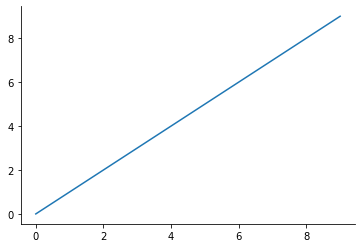

In [ ]:
plt.plot(np.arange(10))

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/sine_sweep.csv'
df_ss = pd.read_csv(filename,sep=';')
time_ss = df_ss['X_Value'].values.reshape(-1,1)
u_ss    = df_ss['force'].values.reshape(-1,1)
y_ss    = df_ss['Ch3'].values.reshape(-1,1)

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/white_noise_1.csv'
df_wn = pd.read_csv(filename,sep=';')
time_wn = df_wn['X_Value'].values.reshape(-1,1)
u_wn    = df_wn['force'].values.reshape(-1,1)
y_wn    = df_wn['Ch3'].values.reshape(-1,1)

In [ ]:
# plot fast-fourier-transform
def plot_fft(x,fs,time):
    x = x.reshape(-1,)
    N = x.size
    # compute fft
    fft_x = fft(x)
    freq_vector = fftfreq(N, 1/fs)
    indx = freq_vector>=0
    freq_vector = freq_vector[indx]
    fft_x = fft_x[indx]

    # plot fft
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(20, 2)
    
    ax1.plot(time,x)
    ax1.set_xlabel('Time [s]')
    ax1.set_title('Time Domain')

    ax2.plot(freq_vector,abs(fft_x)/(freq_vector.size))
    ax2.set_xlabel('Freq [Hz]')
    ax2.set_title('Fourier Transform')
    
    # plt.tight_layout()
    plt.show()

# print modle training results
def print_result(model):
    result = pd.DataFrame(results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='dec'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
    print(result)

# dividir dados para treino e validação
def split_train_test(x,n_train,n_test):
    train = x[0:n_train]
    test  = x[n_train:n_train+n_test]
    return train, test

# Data scaling: -1,1
def scaler(x,x0,delta):
    return (x-x0)/delta

def rescaler(x,x0,delta):
    return x*delta+x0

def corr_plot(x1, x2=None, figsize=(20,3), maxlags=50):
    x1 = x1.reshape(-1,)
    conf_level = 1.96 / np.sqrt(x1.size)  # 95% CI
    plt.figure(figsize=figsize)
    if x2 is None:
        plt.acorr(x1, normed=True, maxlags=maxlags, lw=2, color='black')
        plt.title(r'Autocorrelation $\xi\xi$')
    else:
        x2 = x2.reshape(-1,)
        plt.xcorr(x1,x2, maxlags=maxlags, normed=True, lw=2, color='black')
        plt.title(r'Cross-correlation $\xi u$')
    plt.axhline(y=conf_level, color='grey', linestyle='--')
    plt.axhline(y=-conf_level, color='grey', linestyle='--', label='95% Confidence interval')

In [ ]:
def matReg(y,u,ny,nu):
    # for debuging code
    # y= np.array([1, 2, 3,4,5,6,7,8,9,10])
    # u= np.array([1, 2, 3,4,5,6,7,8,9,10])

    p = np.max((ny,nu)) + 1
    (N, ) = y.shape
    (Nu, ) = u.shape
    
    # sanity check
    if N != Nu:
        print('Dimensions of u and y vector are not consistent')
        return (-1,-1)
    
    # create target vector
    target = y[p-1:N]

    # create regression matrix
    Phi = np.zeros((N-p+1,ny+nu))
    for i in range(ny):
        Phi[:,i]    = y[p-i-2: N - i-1]

    for i in range(nu):
        Phi[:,i+ny] = u[p-i-2: N - i-1]

    return (target, Phi)


def freeRun(model, y, u,ny,nu):
    p = max(ny,nu) + 1 
    (N, ) = y.shape

    yhat = np.zeros(N)
    yhat[:p-1] = y[:p-1] # include initial conditions

    for k in range(p,N+1):
        # print(k)
        auxY = np.concatenate((  yhat[(k-p):(k-1)]   ,  (0,)   ),axis=0)
        auxU = np.concatenate((  u   [(k-p):(k-1)]   ,  (0,)   ),axis=0)
        
        _,fr_input = matReg(auxY,auxU,ny,nu)
        yhat[k-1] = model.predict(fr_input)
    # return only the values that are predictions
    # (remove the initial conditions)
    return yhat[-(N-p+1):] 

Escalocamento dos dados

In [ ]:
ymin = np.concatenate((y_ss.reshape(-1,), y_wn.reshape(-1,)),axis=None).min()
ymax = np.concatenate((y_ss.reshape(-1,), y_wn.reshape(-1,)),axis=None).max()
y0, deltay = (ymax+ymin)/2, (ymax-ymin)/2

umin = np.concatenate((u_ss.reshape(-1,), u_wn.reshape(-1,)),axis=None).min()
umax = np.concatenate((u_ss.reshape(-1,), u_wn.reshape(-1,)),axis=None).max()
u0, deltau = (umax+umin)/2, (umax-umin)/2

u_ss, u_wn = scaler(u_ss,u0,deltau), scaler(u_wn,u0,deltau)
y_ss, y_wn = scaler(y_ss,y0,deltay), scaler(y_wn,y0,deltay)

pd.DataFrame(data={'x0':[u0, y0], 'deltax':[deltau, deltay]},index=['u','y'])

,x0,deltax
u,0.054042,6.509564
y,-0.063544,4.289248


In [ ]:
n1 = 160000  # samples for training
n2 = 40000  # samples for validation

# Sine Sweep
time_ss_train, time_ss_test = split_train_test(time_ss,n1,n2)
u_ss_train, u_ss_test = split_train_test(u_ss,n1,n2)
y_ss_train, y_ss_test = split_train_test(y_ss,n1,n2)

# White Noise
time_wn_train, time_wn_test = split_train_test(time_wn,n1,n2)
u_wn_train, u_wn_test = split_train_test(u_wn,n1,n2)
y_wn_train, y_wn_test = split_train_test(y_wn,n1,n2)

# FROLS

In [ ]:
orders = [18]
degree  = 2
final_r2s = {}

In [ ]:
print('SS_SS    SS_WN   WN_SS   WN_WN')
for i in range(np.size(orders)):
    ny, nu = orders[i], orders[i]
    
    print('------------------------------------------------')
    print(f'ny = {ny}  |  nu = {nu}')

    # define model
    
    model = FROLS(basis_function=Polynomial(degree=degree),
                    order_selection=True,
                    # n_info_values=ny+nu,
                    n_info_values=40,
                    # n_terms=10,
                    extended_least_squares=False,
                    ylag=ny, xlag=nu,
                    # elag=elag,
                    info_criteria='bic',
                    estimator='least_squares',
                    model_type='NARMAX',
                    )

    # treino: Sine Sweep
    model_ss = model.fit(X=u_ss_train, y=y_ss_train)

    # validação (OSA)
    yhat_ss_ss = model_ss.predict(X=u_ss_test,y=y_ss_test,steps_ahead=None)
    try:
        r2_ss_ss = r2_score(y_ss_test,yhat_ss_ss)
    except:
        r2_ss_ss = 0
    yhat_ss_wn = model_ss.predict(X=u_wn_test,y=y_wn_test,steps_ahead=None)
    try:
        r2_ss_wn = r2_score(y_wn_test,yhat_ss_wn)
    except:
        r2_ss_wn =0

    # treino: White Noise
    model_wn = model.fit(X=u_wn_train, y=y_wn_train)

    # validação (OSA)
    yhat_wn_ss = model_wn.predict(X=u_ss_test,y=y_ss_test,steps_ahead=None)
    try:
        r2_wn_ss = r2_score(y_ss_test,yhat_wn_ss)
    except:
        r2_wn_ss = 0
        
    yhat_wn_wn = model_wn.predict(X=u_wn_test,y=y_wn_test,steps_ahead=None)
    try:
        r2_wn_wn = r2_score(y_wn_test,yhat_wn_wn)
    except:
        r2_wn_wn = 0
    r2s = [round(r2_ss_ss,3), round(r2_ss_wn,3), round(r2_wn_ss,3), round(r2_wn_wn,3)]
    print(r2s)
    final_r2s[ny] = r2s

SS_SS    SS_WN   WN_SS   WN_WN
------------------------------------------------
ny = 18  |  nu = 18
[0.88, 0.368, 0.857, 0.799]


In [ ]:
final_r2s

{18: [0.88, 0.368, 0.857, 0.799]}

In [ ]:
print_result(model_wn)

         Regressors Parameters         ERR
0            y(k-2)    -0.7678  0.32401875
1            y(k-3)     0.5162  0.17793278
2           y(k-11)     0.3759  0.12962255
3           y(k-12)    -0.0462  0.07780730
4           y(k-18)    -0.0499  0.05000815
5           x1(k-5)    -0.8277  0.03170353
6            y(k-6)     0.0397  0.02679957
7           x1(k-7)    -1.4786  0.01781925
8            y(k-9)    -0.6444  0.01057147
9          x1(k-18)     0.0142  0.00879366
10          y(k-13)     0.2411  0.00861044
11          y(k-15)     0.0448  0.01102831
12         x1(k-13)     0.0325  0.01079709
13           y(k-1)    -0.0132  0.01106884
14         x1(k-17)     0.1505  0.00625692
15         x1(k-10)     1.2094  0.00519384
16          x1(k-1)     0.1846  0.00384204
17           y(k-7)    -0.7723  0.00330701
18           y(k-4)    -0.2136  0.00295398
19          x1(k-9)    -1.6849  0.00413699
20           y(k-8)     0.0377  0.00346223
21          x1(k-6)     1.2904  0.00122177
22         

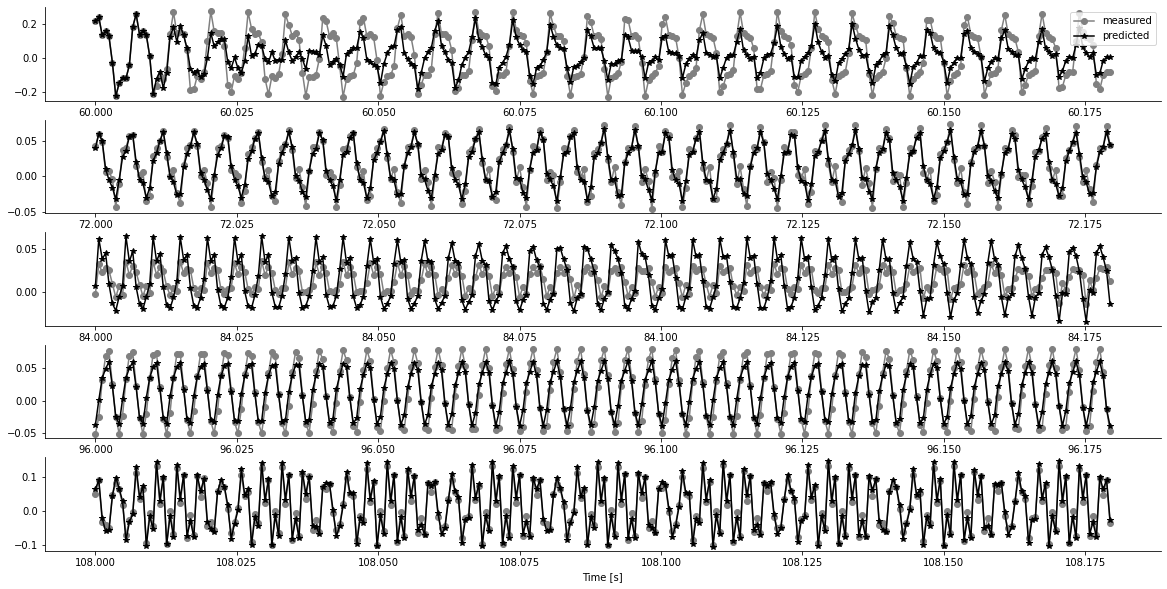

In [ ]:
# plotar previsões em subplots (n2=100000 validação)
n_subplot = 5
n_dados   = 300

figsize = (20,10)
# plot predictions
fig, ax = plt.subplots(n_subplot,1,figsize=figsize)
for i in range(n_subplot):
    ind = range(int((n2/n_subplot)*i),int((n2/n_subplot)*i)+n_dados)
    t_ind = range(ind[0]+n1, ind[0]+n1+n_dados)
    ax[i].plot(time_ss[t_ind],y_ss_test[ind], color='gray', label='measured',marker='o')
    ax[i].plot(time_ss[t_ind],yhat_wn_ss[ind], color='black', label='predicted',marker='*')
    if i==0: ax[i].legend(loc='upper right')
    if i==(n_subplot-1): ax[i].set_xlabel('Time [s]')


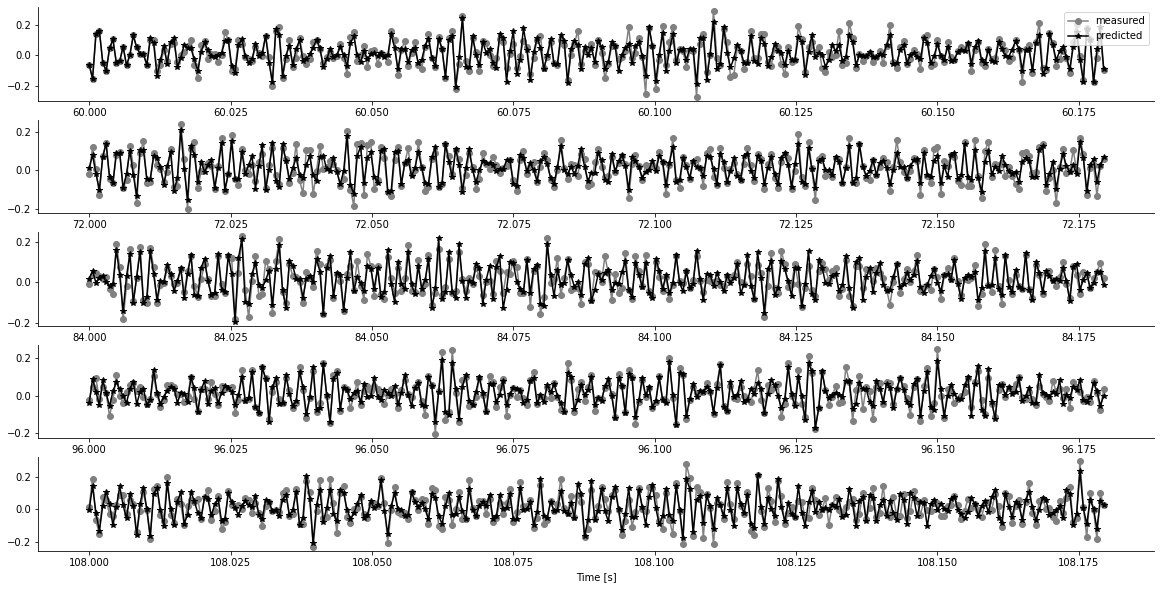

In [ ]:
figsize = (20,10)
# plot predictions
fig, ax = plt.subplots(n_subplot,1,figsize=figsize)
for i in range(n_subplot):
    ind = range(int((n2/n_subplot)*i),int((n2/n_subplot)*i)+n_dados)
    t_ind = range(ind[0]+n1, ind[0]+n1+n_dados)
    ax[i].plot(time_wn[t_ind],y_wn_test[ind], color='gray', label='measured',marker='o')
    ax[i].plot(time_wn[t_ind],yhat_wn_wn[ind], color='black', label='predicted',marker='*')
    if i==0: ax[i].legend(loc='upper right')
    if i==(n_subplot-1): ax[i].set_xlabel('Time [s]')


pvalue of residuals = 3.4247488434905783e-11


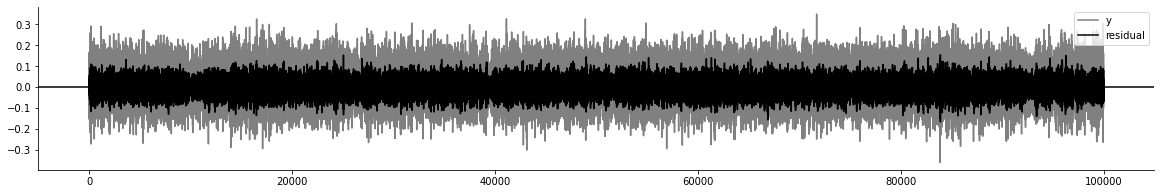

In [ ]:
figsize = (20,3)

# plot residuals
residual = y_wn_test - yhat_wn_wn
plt.figure(figsize=figsize)
plt.plot(y_wn_test[:n2], color='gray', label='y')
plt.plot(residual[:n2], color='black', label='residual')
plt.legend(loc='upper right')
plt.axhline(y=0, color='black')
print(f'pvalue of residuals = {stats.normaltest(residual).pvalue[0]}')

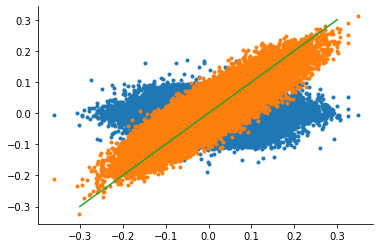

In [ ]:
plt.plot(y_wn_test,residual,'.')
plt.plot(y_wn_test,yhat_wn_wn,'.')
plt.plot([-0.3,0.3],[-0.3,0.3])

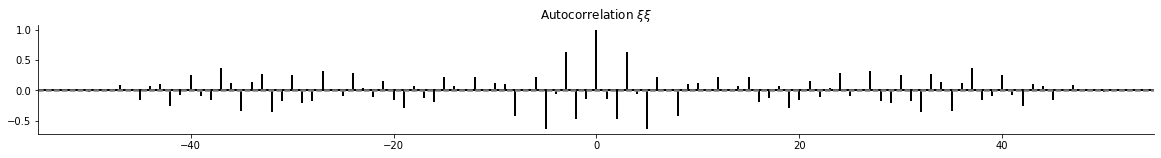

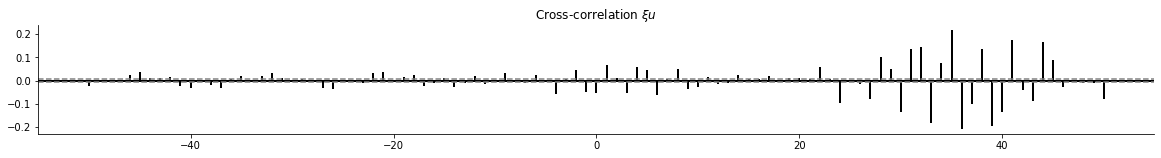

In [ ]:
figsize = (20,2)
maxlags = 50
corr_plot(x1=residual,maxlags=maxlags,figsize=figsize)
corr_plot(x1=residual, x2=u_wn_test, maxlags=maxlags,figsize=figsize)

pvalue of residuals = 0.0


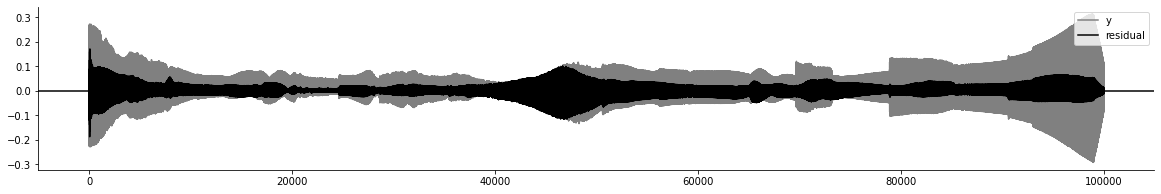

In [ ]:
figsize = (20,3)

# plot residuals
residual = y_ss_test - yhat_wn_ss
plt.figure(figsize=figsize)
plt.plot(y_ss_test[:n2], color='gray', label='y')
plt.plot(residual[:n2], color='black', label='residual')
plt.legend(loc='upper right')
plt.axhline(y=0, color='black')
print(f'pvalue of residuals = {stats.normaltest(residual).pvalue[0]}')

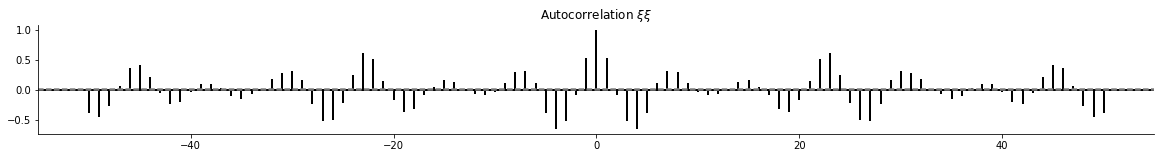

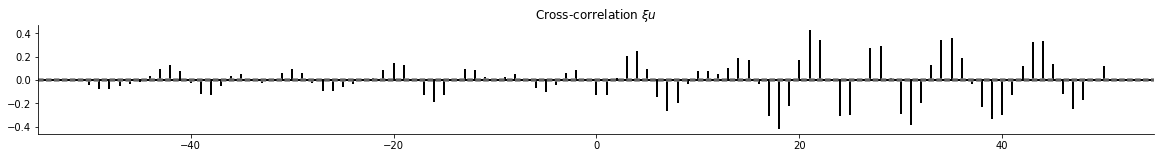

In [ ]:
figsize = (20,2)
maxlags = 50
corr_plot(x1=residual,maxlags=maxlags,figsize=figsize)
corr_plot(x1=residual, x2=u_ss_test, maxlags=maxlags,figsize=figsize)

# NARXNN

In [ ]:
print(torch.cuda.is_available())
device = "cuda" if torch.cuda.is_available() else "cpu" 
print(f"Using {device} device")

False
Using cpu device


In [ ]:
degree = 2
n      = 18
ylag, xlag = n, n

In [ ]:
basis_function = Polynomial(degree=degree)
narx_net = NARXNN(
    ylag=ylag,
    xlag=xlag,
    basis_function=basis_function,
    model_type="NARMAX",
    loss_func='mse_loss',
    optimizer='Adam',
    epochs=2000,
    verbose=False,
    device="cuda",
    optim_params={
        'betas': (0.9, 0.999),
        'eps': 1e-05
        } # optional parameters of the optimizer
)

In [ ]:
n_features = int(factorial(xlag+ylag+degree) / (factorial(degree) * factorial(xlag+ylag))) - 1
print(n_features)

702


In [ ]:
class NARX(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(n_features, 30)
        self.lin2 = nn.Linear(30, 30)
        self.lin3 = nn.Linear(30, 1)
        self.tanh = nn.Tanh()

    def forward(self, xb):
        z = self.lin(xb)
        z = self.tanh(z)
        z = self.lin2(z)
        z = self.tanh(z)
        z = self.lin3(z)
        return z

In [ ]:
narx_net.net = NARX()
narx_net.net.to(torch.device(device))

NARX(
  (lin): Linear(in_features=702, out_features=30, bias=True)
  (lin2): Linear(in_features=30, out_features=30, bias=True)
  (lin3): Linear(in_features=30, out_features=1, bias=True)
  (tanh): Tanh()
)

In [ ]:
# narx_net.fit(X=x_train, y=y_train, X_test=x_valid, y_test=y_valid)
narx_net.fit(X=u_wn_train, y=y_wn_train)

White Noise signal validation

R2:  0.7717281387582776


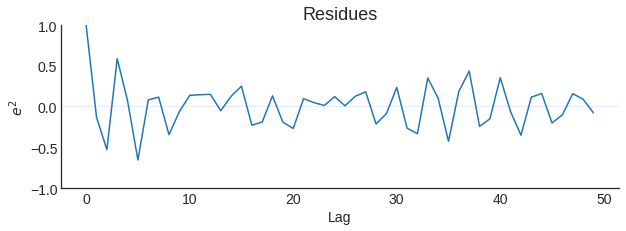

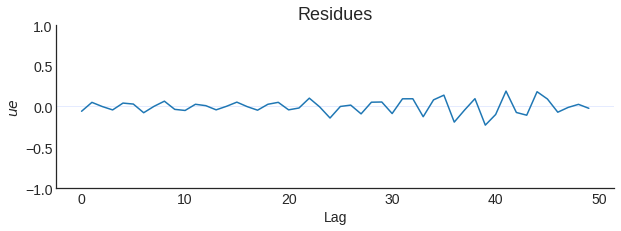

In [ ]:
yhat_wn_wn = narx_net.predict(X=u_wn_test, y=y_wn_test, steps_ahead=None)
print("R2: ", r2_score(y_wn_test,yhat_wn_wn))

# plot_results(y=y_wn_test, yhat=yhat, n=1000)

maxlags = 50
figsize = (10,3)

ee = compute_residues_autocorrelation(y_wn_test, yhat_wn_wn)
ee = (ee[0][0:maxlags],ee[1],ee[2])
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$",figsize=figsize)

x1e = compute_cross_correlation(y_wn_test, yhat_wn_wn, u_wn_test)
x1e = (x1e[0][0:maxlags],x1e[1],x1e[2])
plot_residues_correlation(data=x1e, title="Residues", ylabel="$ue$",figsize=figsize)

# r2: 0.74478134694624

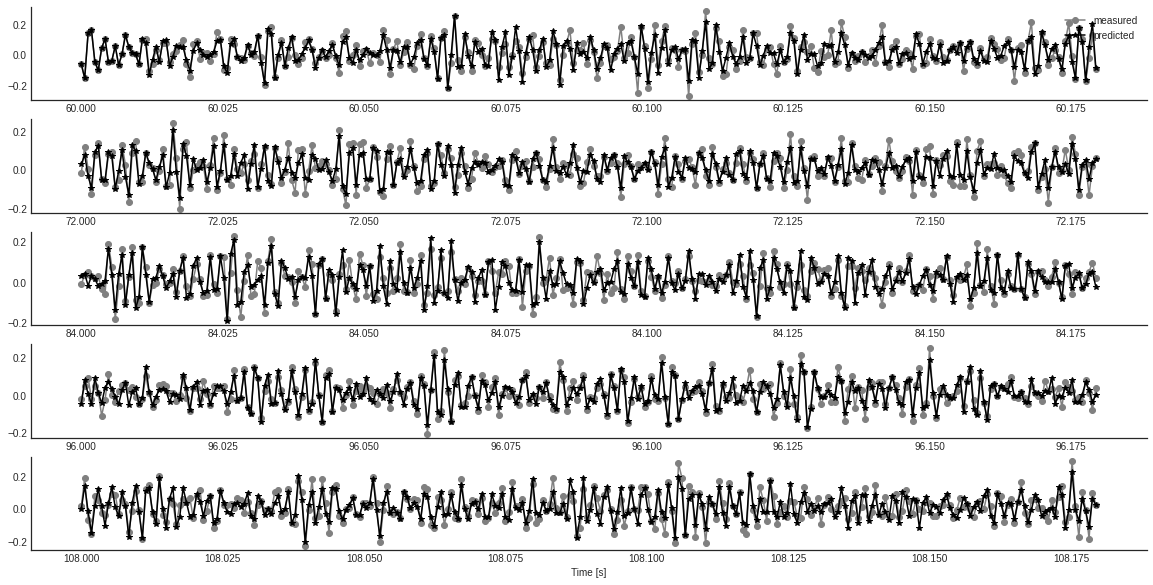

In [ ]:
# plotar previsões em subplots (n2=100000 validação)
n_subplot = 5
n_dados   = 300

figsize = (20,10)
# plot predictions
fig, ax = plt.subplots(n_subplot,1,figsize=figsize)
for i in range(n_subplot):
    ind = range(int((n2/n_subplot)*i),int((n2/n_subplot)*i)+n_dados)
    t_ind = range(ind[0]+n1, ind[0]+n1+n_dados)
    ax[i].plot(time_wn[t_ind],y_wn_test[ind], color='gray', label='measured',marker='o')
    ax[i].plot(time_wn[t_ind],yhat_wn_wn[ind], color='black', label='predicted',marker='*')
    if i==0: ax[i].legend(loc='upper right')
    if i==(n_subplot-1): ax[i].set_xlabel('Time [s]')


Sine Sweep signal validation

In [ ]:
yhat_wn_ss = narx_net.predict(X=u_ss_test, y=y_ss_test, steps_ahead=None)

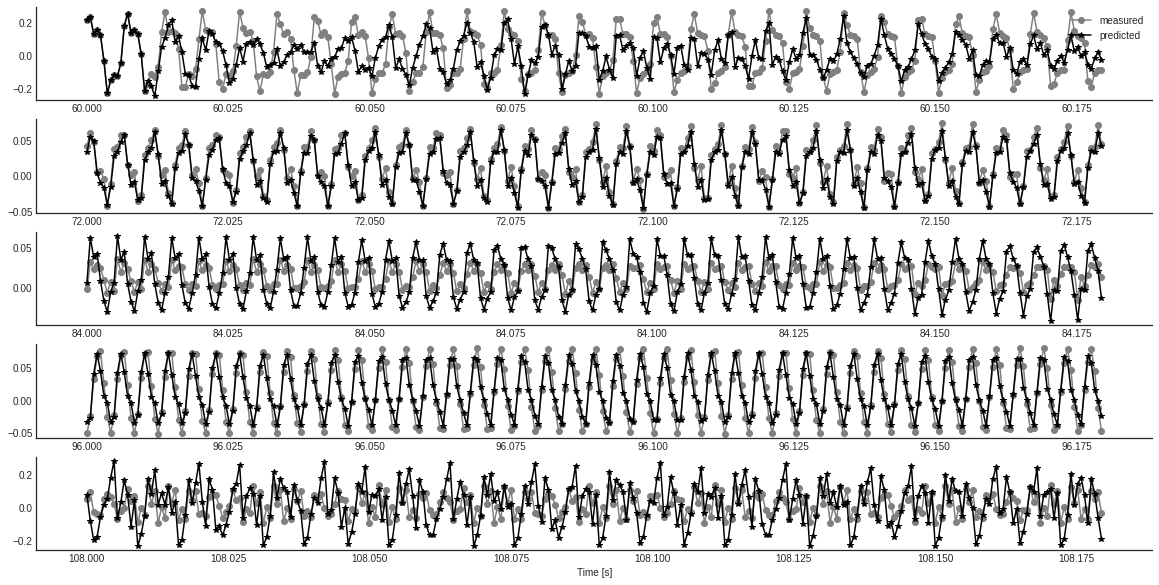

In [ ]:
# plotar previsões em subplots (n2=100000 validação)
n_subplot = 5
n_dados   = 300

figsize = (20,10)
# plot predictions
fig, ax = plt.subplots(n_subplot,1,figsize=figsize)
for i in range(n_subplot):
    ind = range(int((n2/n_subplot)*i),int((n2/n_subplot)*i)+n_dados)
    t_ind = range(ind[0]+n1, ind[0]+n1+n_dados)
    ax[i].plot(time_ss[t_ind],y_ss_test[ind], color='gray', label='measured',marker='o')
    ax[i].plot(time_ss[t_ind],yhat_wn_ss[ind], color='black', label='predicted',marker='*')
    if i==0: ax[i].legend(loc='upper right')
    if i==(n_subplot-1): ax[i].set_xlabel('Time [s]')


R2:  0.4003032846178932


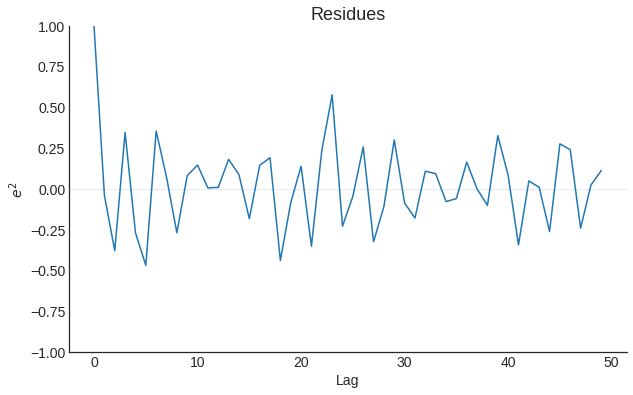

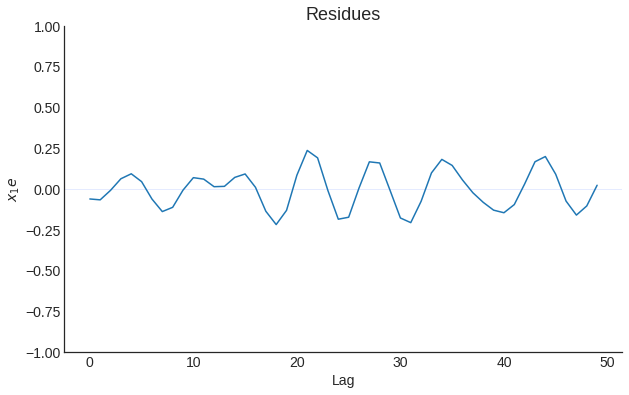

In [ ]:
print("R2: ", r2_score(y_ss_test,yhat_wn_ss))
# plot_results(y=y_ss_test, yhat=yhat, n=1000)

ee = compute_residues_autocorrelation(y_ss_test, yhat_wn_ss)
ee = (ee[0][0:maxlags],ee[1],ee[2])
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_ss_test, yhat_wn_ss, u_ss_test)
x1e = (x1e[0][0:maxlags],x1e[1],x1e[2])
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

# ANN (codigo Helon, ex:Narendra)

Create output and regression matrix

In [ ]:
n  = 18
ny = n
nu = n # model orders
(Y_wn_train,Phi_wn_train) = matReg(y_wn_train.reshape(-1,),u_wn_train.reshape(-1,),ny,nu)
(Y_wn_test,Phit_wn_test) = matReg(y_wn_test.reshape(-1,),u_wn_test.reshape(-1,),ny,nu)
(Y_ss_test,Phit_ss_test) = matReg(y_ss_test.reshape(-1,),u_ss_test.reshape(-1,),ny,nu)

Define model architecture

In [ ]:
_ , ninp = Phi_wn_train.shape
nout = 1
nneu = 50     # how many neurons per layer
h_layer = 3   # how many hidden layers

# model definition
input_ = keras.layers.Input(shape=(ninp,))
hidden = keras.layers.Dense(nneu, activation="selu",kernel_initializer="lecun_normal",)(input_)
h = 1
while h<h_layer:
    h += 1
    hidden = keras.layers.Dense(nneu, activation="selu",kernel_initializer="lecun_normal")(hidden)

output = keras.layers.Dense(nout)(hidden)
# instantiate model
model = keras.models.Model(inputs=[input_],outputs=[output])
# define optimizer and learning rate
optimizer = keras.optimizers.Nadam(learning_rate = 1e-3)
# compile model to train it
model.compile(loss="mean_squared_error", optimizer=optimizer)

Finally train the model

In [ ]:
batch_size = 500
epochs     = 60
history = model.fit(Phi_wn_train, Y_wn_train, epochs=epochs, batch_size = batch_size)

Epoch 1/60
320/320 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 2/60
320/320 [==============================] - 1s 3ms/step - loss: 4.7809e-04
Epoch 3/60
320/320 [==============================] - 2s 7ms/step - loss: 3.8484e-04
Epoch 4/60
320/320 [==============================] - 2s 6ms/step - loss: 3.4329e-04
Epoch 5/60
320/320 [==============================] - 2s 6ms/step - loss: 3.1622e-04
Epoch 6/60
320/320 [==============================] - 2s 6ms/step - loss: 2.9969e-04
Epoch 7/60
320/320 [==============================] - 2s 6ms/step - loss: 2.8207e-04
Epoch 8/60
320/320 [==============================] - 2s 6ms/step - loss: 2.7408e-04
Epoch 9/60
320/320 [==============================] - 2s 6ms/step - loss: 2.5978e-04
Epoch 10/60
320/320 [==============================] - 2s 6ms/step - loss: 2.5603e-04
Epoch 11/60
320/320 [==============================] - 2s 7ms/step - loss: 2.4688e-04
Epoch 12/60
320/320 [==============================] - 2s 6ms/step 

Run free-run simulation (prediction over prediction)

In [ ]:
Y_wn_test.reshape(-1,).shape

(39982,)

In [ ]:
# white noise
yhat_wn_wn  = freeRun(model,y_wn_test.reshape(-1,),u_wn_test.reshape(-1,),ny,nu)

# R2train0 = r2_score(Ye_n, ye_pred0_n)
R2test0  = r2_score(Y_wn_test, yhat_wn_wn)

print('-------------- Free Run  --------------')
print(f'R2test0   =  {R2test0}')
# print(f'R2train0  =  {R2train0}')

A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 25ms/step
-------------- Free Run  --------------
R2test0   =  0.7979917019700016


# EXPORT

In [ ]:
# rescaler
y_wn_test   = rescaler(y_wn_test,y0,deltay)
yhat_wn_wn  = rescaler(yhat_wn_wn,y0,deltay)
u_wn_test   = rescaler(u_wn_test,u0,deltau)

In [ ]:
# export predictions
filename = '/content/drive/MyDrive/Colab Notebooks/ARXNN_casoR_wn.xlsx'
E_wn = pd.DataFrame(data={'y_wn':y_wn_test.reshape(-1,)[n:],
                     'yhat_wn':yhat_wn_wn.reshape(-1,),
                     'u_wn':u_wn_test.reshape(-1,)[n:]}, 
                    index=None)
E_wn.to_excel(filename)

In [ ]:
# sine sweep
yhat_wn_ss  = freeRun(model,y_ss_test.reshape(-1,),u_ss_test.reshape(-1,),ny,nu)

# R2train0 = r2_score(Ye_n, ye_pred0_n)
R2test0  = r2_score(Y_ss_test, yhat_wn_ss)

print('-------------- Free Run  --------------')
print(f'R2test0   =  {R2test0}')
# print(f'R2train0  =  {R2train0}')

A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 25ms/step
-------------- Free Run  --------------
R2test0   =  0.925943601170005


In [ ]:
y_ss_test   = rescaler(y_ss_test,y0,deltay)
yhat_wn_ss  = rescaler(yhat_wn_ss,y0,deltay)
u_ss_test   = rescaler(u_ss_test,u0,deltau)

In [ ]:
# export predictions
filename = '/content/drive/MyDrive/Colab Notebooks/ARXNN_casoR_ss.xlsx'
E_wn = pd.DataFrame(data={'y_ss':y_ss_test.reshape(-1,)[n:],
                     'yhat_ss':yhat_wn_ss.reshape(-1,),
                     'u_ss':u_ss_test.reshape(-1,)[n:]}, 
                    index=None)
E_wn.to_excel(filename)